In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import shapiro

In [3]:
datos = pd.read_csv("C:\\Users\\Ignacio\\Desktop\\Ciencia de datos\\student perfirmance prediction\\exams.csv")

In [4]:
datos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## Dictionary

### Columns:
#### • Gender: The gender of the student (male/female)
#### • Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)
#### • Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)
#### • Lunch: Whether the student receives free or reduced-price lunch (yes/no)
#### • Test preparation course: Whether the student completed a test preparation course (yes/no)
#### • Math score: The student's score on a standardized mathematics test
#### • Reading score: The student's score on a standardized reading test
#### • Writing score: The student's score on a standardized writing test

In [5]:
datos.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
group = datos[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]]
datos[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]] = pd.DataFrame(ordinal_encoder.fit_transform(group))
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

female = 0;male = 1;||
group A = 0, group B = 1, group C = 2, group D = 3, group E = 4;||
associate's degree = 0, bachelor's degree = 1, high school = 2, master's degree = 3, some college = 4, some high school = 5;||
free/reduced = 0, standard = 1;||
completed = 0, none = 1


In [8]:
score_total = (datos["math score"] + datos["reading score"] + datos["writing score"])/3
score_total

0      69.000000
1      92.000000
2      70.000000
3      67.666667
4      84.666667
         ...    
995    75.000000
996    70.666667
997    79.666667
998    71.333333
999    50.000000
Length: 1000, dtype: float64

In [9]:
datos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,3.0,4.0,1.0,0.0,59,70,78
1,1.0,3.0,0.0,1.0,1.0,96,93,87
2,0.0,3.0,4.0,0.0,1.0,57,76,77
3,1.0,1.0,4.0,0.0,1.0,70,70,63
4,0.0,3.0,0.0,1.0,1.0,83,85,86
...,...,...,...,...,...,...,...,...
995,1.0,2.0,4.0,1.0,1.0,77,77,71
996,1.0,2.0,4.0,1.0,1.0,80,66,66
997,0.0,0.0,2.0,1.0,0.0,67,86,86
998,1.0,4.0,2.0,1.0,1.0,80,72,62


## Data Analysis

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'race/ethnicity'}>,
        <Axes: title={'center': 'parental level of education'}>],
       [<Axes: title={'center': 'lunch'}>,
        <Axes: title={'center': 'test preparation course'}>,
        <Axes: title={'center': 'math score'}>],
       [<Axes: title={'center': 'reading score'}>,
        <Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

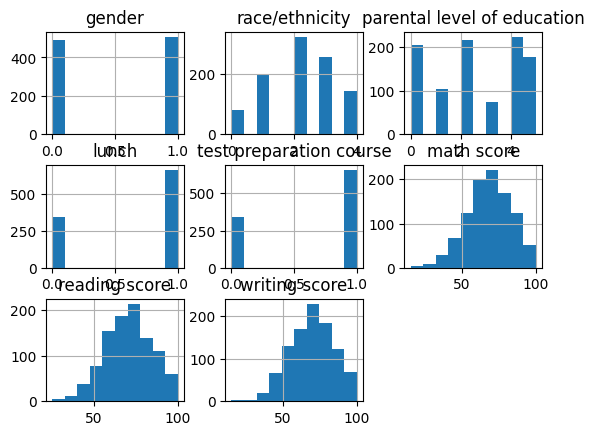

In [10]:
datos.hist()

### Distribución de población

Text(0.5, 1.0, 'percentage of male and female population')

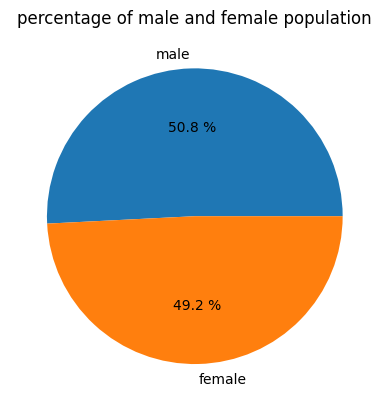

In [11]:
female = sum(datos["gender"] == 0)
male = sum(datos["gender"] == 1) 
sex = [male,female]
names = ["male","female"]
plt.pie(sex,labels = names,autopct="%0.1f %%")
plt.title("percentage of male and female population")

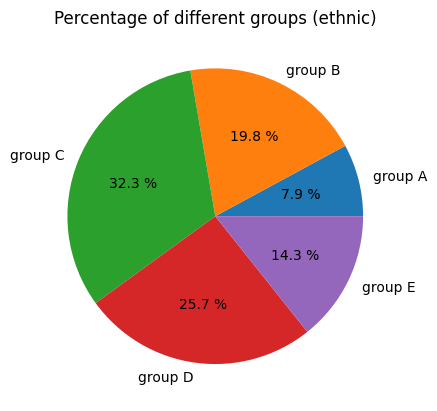

In [12]:
#Defino nuevas variables para ver la relacion entre gender y race/ethnicity para luego sacar porcentajes
raice_0 = datos["race/ethnicity"]==0
raice_1 = datos["race/ethnicity"]==1
raice_2 = datos["race/ethnicity"]==2
raice_3 = datos["race/ethnicity"]==3
raice_4 = datos["race/ethnicity"]==4

names = ['group A', 'group B', 'group C', 'group D', 'group E']

raice_t = [sum(raice_0),sum(raice_1),sum(raice_2),sum(raice_3),sum(raice_4)]
plt.pie(raice_t,labels = names,autopct="%0.1f %%")
plt.title("Percentage of different groups (ethnic)")


gender_raice_f = datos.loc[datos["gender"]==0 , "race/ethnicity"]
gender_raice_f = pd.DataFrame(gender_raice_f)
gender_raice_f0 = gender_raice_f["race/ethnicity"]==0
gender_raice_f1 = gender_raice_f["race/ethnicity"]==1
gender_raice_f2 = gender_raice_f["race/ethnicity"]==2
gender_raice_f3 = gender_raice_f["race/ethnicity"]==3
gender_raice_f4 = gender_raice_f["race/ethnicity"]==4


gender_raice_f_t = [sum(gender_raice_f0),sum(gender_raice_f1),sum(gender_raice_f2),sum(gender_raice_f3),sum(gender_raice_f4)]



gender_raice_m = datos.loc[datos["gender"]==1 , "race/ethnicity"]
gender_raice_m = pd.DataFrame(gender_raice_m)
gender_raice_m0 = gender_raice_m["race/ethnicity"]==0
gender_raice_m1 = gender_raice_m["race/ethnicity"]==1
gender_raice_m2 = gender_raice_m["race/ethnicity"]==2
gender_raice_m3 = gender_raice_m["race/ethnicity"]==3
gender_raice_m4 = gender_raice_m["race/ethnicity"]==4


gender_raice_m_t = [sum(gender_raice_m0),sum(gender_raice_m1),sum(gender_raice_m2),sum(gender_raice_m3),sum(gender_raice_m4)]


Text(0.5, 1.0, 'Percentage of women of different groups (ethnic)')

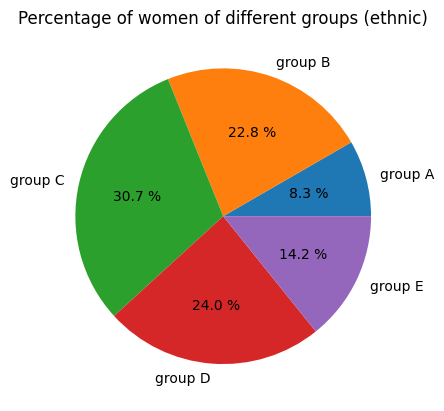

In [13]:
plt.pie(gender_raice_f_t,labels = names,autopct="%0.1f %%")
plt.title("Percentage of women of different groups (ethnic)")

Text(0.5, 1.0, 'Percentage of men of different groups (ethnic)')

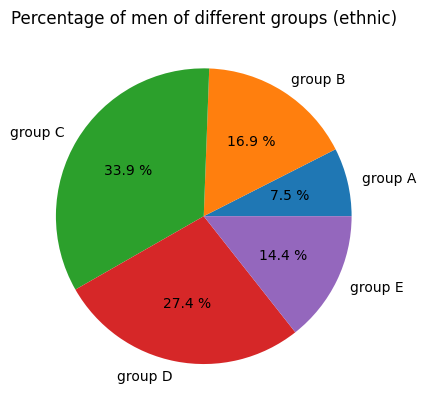

In [14]:
plt.pie(gender_raice_m_t,labels = names,autopct="%0.1f %%")
plt.title("Percentage of men of different groups (ethnic)")

Como existen datos que no cumplen con la condición de distribución normal lo mejor será usar la correlación de Spearman o Kendall

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

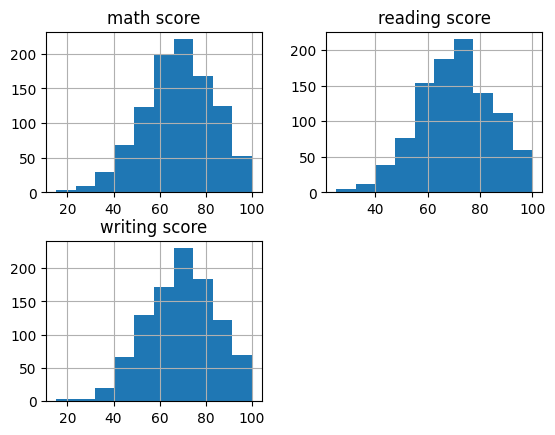

In [15]:
scores = datos[["math score","reading score","writing score"]]
scores.hist()

In [16]:
math_f = datos.loc[datos["gender"]==0,"math score"]
math_f = pd.DataFrame(math_f)
math_m = datos.loc[datos["gender"]==1,"math score"]
math_m = pd.DataFrame(math_m)
writing_f = datos.loc[datos["gender"]==0,"writing score"]
writing_f = pd.DataFrame(writing_f)
writing_m = datos.loc[datos["gender"]==1,"writing score"]
writing_m = pd.DataFrame(writing_m)
reading_f = datos.loc[datos["gender"]==0,"reading score"]
reading_f = pd.DataFrame(reading_f)
reading_m = datos.loc[datos["gender"]==1,"reading score"]
reading_m = pd.DataFrame(reading_m)

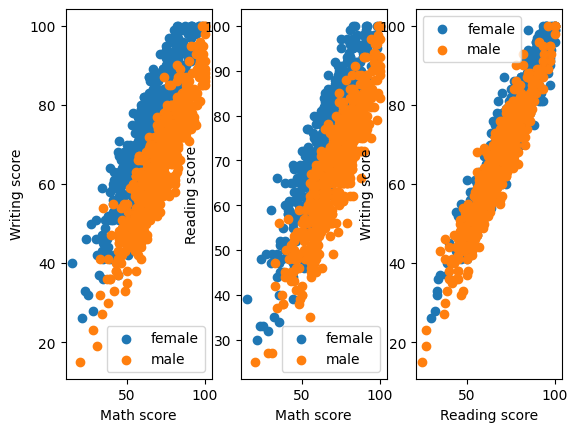

In [17]:
fig, ax = plt.subplots(1,3)
ax[0].scatter(math_f,writing_f,label = "female")
ax[0].scatter(math_m,writing_m,label="male")
ax[0].legend()
ax[0].set_xlabel("Math score")
ax[0].set_ylabel("Writing score")


ax[1].scatter(math_f,reading_f,label = "female")
ax[1].scatter(math_m,reading_m,label="male")
ax[1].legend()
ax[1].set_xlabel("Math score")
ax[1].set_ylabel("Reading score")

ax[2].scatter(reading_f,writing_f,label = "female")
ax[2].scatter(reading_m,writing_m,label="male")
ax[2].legend()
ax[2].set_xlabel("Reading score")
ax[2].set_ylabel("Writing score")
plt.show()


<Axes: xlabel='gender', ylabel='math score'>

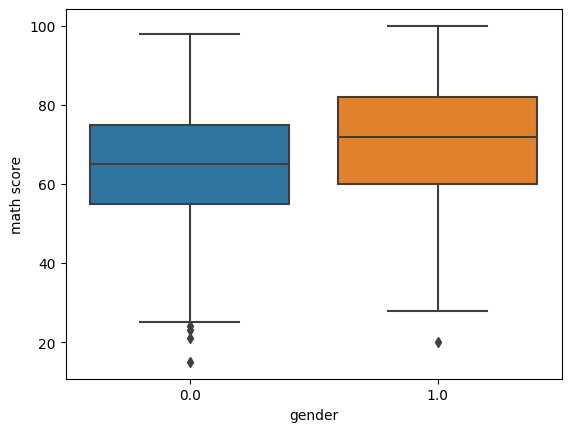

In [18]:
sns.boxplot(x = datos["gender"],y = datos["math score"])

<Axes: xlabel='gender', ylabel='reading score'>

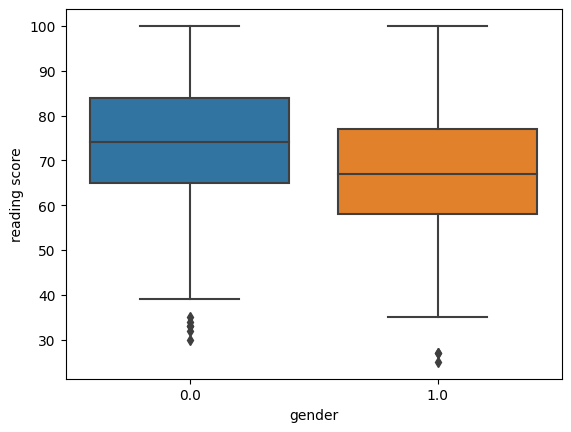

In [19]:
sns.boxplot(x = datos["gender"],y = datos["reading score"])

<Axes: xlabel='gender', ylabel='writing score'>

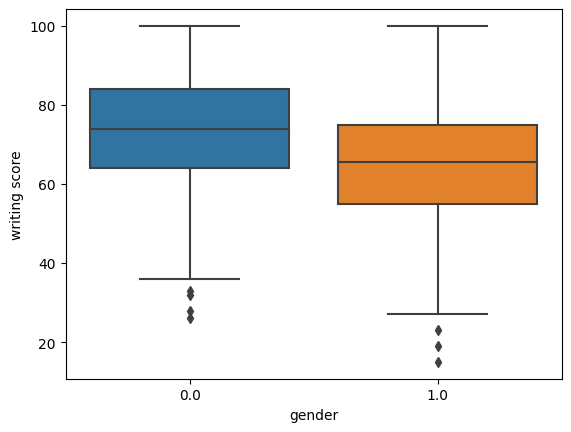

In [20]:
sns.boxplot(x = datos["gender"],y = datos["writing score"])

In [21]:
corr = datos.corr(method="kendall")
corr.style.background_gradient(cmap = 'Oranges')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.047084,0.022477,0.015708,0.032641,0.153739,-0.179531,-0.232236
race/ethnicity,0.047084,1.000000,0.033716,0.011181,-0.009688,0.181307,0.117902,0.129787
parental level of education,0.022477,0.033716,1.000000,0.035081,0.010275,-0.069999,-0.077714,-0.088923
lunch,0.015708,0.011181,0.035081,1.000000,0.093498,0.301930,0.200983,0.197577
test preparation course,0.032641,-0.009688,0.010275,0.093498,1.000000,-0.090727,-0.176620,-0.254463
math score,0.153739,0.181307,-0.069999,0.301930,-0.090727,1.000000,0.614651,0.587189
reading score,-0.179531,0.117902,-0.077714,0.200983,-0.176620,0.614651,1.000000,0.812124
writing score,-0.232236,0.129787,-0.088923,0.197577,-0.254463,0.587189,0.812124,1.000000


Por lo que se puede apreciar solo existen correlaciones importantes entre los puntajes entre materias, por lo que estos serán los predictores.

Además, se observa que aunque la población masculina sea levemente mayor que la femeninna, la población femenina se desempeña de mejor forma en las áreas de escritura (writing) y lectura (reading), mientras que en el área matemática (math) la población masculina se desempeña mejor.
Esto, como podemos ver en la matriz de correlación tiene una influencia despreciable por parte de la "raza" o etnicidad, nivel de educación de los padres, si tiene o no beca de alimentación y quizas lo anti intuitivo: los cursos de preparación para las pruebas son insignificantes.

## Entrenamiento del modelo Lineal Multiple

In [22]:
from sklearn.model_selection import train_test_split
data_math = pd.DataFrame(datos[["reading score", "writing score"]])
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(data_math, datos["math score"], test_size=0.3, random_state=42)

In [23]:
#aplico modelo multilineal
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
regresion_m = linear_model.LinearRegression()
regresion_m.fit(x_train_m,y_train_m)

LinearRegression()

## Predicciones del modelo Lineal Multiple

In [25]:
prediccion_math_1 = regresion_m.predict(x_train_m)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print("Mean squared error: %.2f" % mean_squared_error(y_train_m, prediccion_math_1))
print('Variance score: %.2f' % r2_score(y_train_m, prediccion_math_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_m, prediccion_math_1)))

Mean squared error: 77.60
Variance score: 0.67
Root Mean Squared Error: 8.809102185612334


In [27]:
x_train_m.median()

reading score    70.0
writing score    70.0
dtype: float64

Root Mean Squared Error es levemente superior al 10% de la mediana de los datos de entrenamiento, por lo que no es un buen desempeño del modelo. Esto se puede deber a que se necesitan mas datos o estudiar el fenomeno desde otras variables.

## Ahora crearemos una nueva columna que contenga a las columnas de notas de asignaturas que quizás mejore el rendimiento de predicción

In [34]:
datos["Total average score"] = score_total
datos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total mean score,Total average score
0,0.0,3.0,4.0,1.0,0.0,59,70,78,69.000000,69.000000
1,1.0,3.0,0.0,1.0,1.0,96,93,87,92.000000,92.000000
2,0.0,3.0,4.0,0.0,1.0,57,76,77,70.000000,70.000000
3,1.0,1.0,4.0,0.0,1.0,70,70,63,67.666667,67.666667
4,0.0,3.0,0.0,1.0,1.0,83,85,86,84.666667,84.666667
...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,4.0,1.0,1.0,77,77,71,75.000000,75.000000
996,1.0,2.0,4.0,1.0,1.0,80,66,66,70.666667,70.666667
997,0.0,0.0,2.0,1.0,0.0,67,86,86,79.666667,79.666667
998,1.0,4.0,2.0,1.0,1.0,80,72,62,71.333333,71.333333


In [35]:
corr = datos.corr(method="kendall")
corr.style.background_gradient(cmap = 'Oranges')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total mean score,Total average score
gender,1.000000,0.047084,0.022477,0.015708,0.032641,0.153739,-0.179531,-0.232236,-0.085768,-0.085768
race/ethnicity,0.047084,1.000000,0.033716,0.011181,-0.009688,0.181307,0.117902,0.129787,0.148476,0.148476
parental level of education,0.022477,0.033716,1.000000,0.035081,0.010275,-0.069999,-0.077714,-0.088923,-0.082902,-0.082902
lunch,0.015708,0.011181,0.035081,1.000000,0.093498,0.301930,0.200983,0.197577,0.245682,0.245682
test preparation course,0.032641,-0.009688,0.010275,0.093498,1.000000,-0.090727,-0.176620,-0.254463,-0.181139,-0.181139
math score,0.153739,0.181307,-0.069999,0.301930,-0.090727,1.000000,0.614651,0.587189,0.745712,0.745712
reading score,-0.179531,0.117902,-0.077714,0.200983,-0.176620,0.614651,1.000000,0.812124,0.850598,0.850598
writing score,-0.232236,0.129787,-0.088923,0.197577,-0.254463,0.587189,0.812124,1.000000,0.831815,0.831815
Total mean score,-0.085768,0.148476,-0.082902,0.245682,-0.181139,0.745712,0.850598,0.831815,1.000000,1.000000
Total average score,-0.085768,0.148476,-0.082902,0.245682,-0.181139,0.745712,0.850598,0.831815,1.000000,1.000000


Al calcular el desempeño general (promedio simple entre las tres áreas) podemos observar que el desempeño es levemente mejor en la población femenina que la masculina, correspondiendose a la muy leve correlación inversa existente entre el género y el puntaje promedio total.

<Axes: xlabel='gender', ylabel='Total average score'>

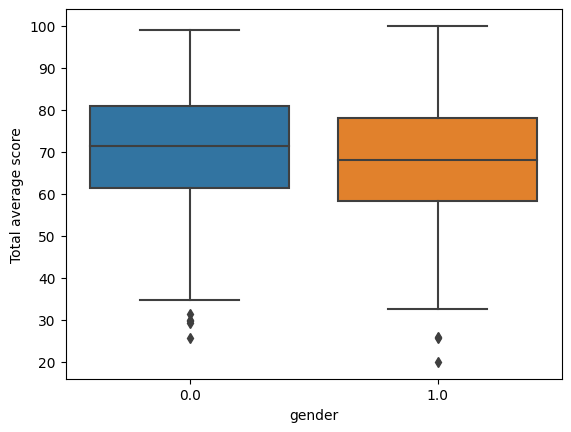

In [33]:
sns.boxplot(x = datos["gender"],y = datos["Total average score"])

## Entrenamiento

In [36]:
data = pd.DataFrame(datos[["math score", "reading score", "writing score"]])
x_train, x_test, y_train, y_test = train_test_split(data, datos["Total mean score"], test_size=0.3, random_state=42)

In [37]:
regresion = linear_model.LinearRegression()
regresion.fit(x_train,y_train)

LinearRegression()

In [38]:
prediccion_train = regresion.predict(x_train)

In [39]:
print("Mean squared error: %.2f" % mean_squared_error(y_train, prediccion_train))
print('Variance score: %.2f' % r2_score(y_train, prediccion_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, prediccion_train)))

Mean squared error: 0.00
Variance score: 1.00
Root Mean Squared Error: 1.5868914016181196e-14


## Predicción

In [40]:
prediccion = regresion.predict(x_test)

In [41]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediccion))
print('Variance score: %.2f' % r2_score(y_test, prediccion))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))

Mean squared error: 0.00
Variance score: 1.00
Root Mean Squared Error: 1.6352777400934683e-14


Por lo tanto se observa que agrupando las notas de los distintos cursos se obtiene una mejor predicción y que en realidad los demás factores como etnicidad, educación de los padres, genero, almuerzo y cursos de preparación, si bien juegan un papel en la obtención de puntajes estos son muy despreciables en comparación con la obtención de notas entre las asignaturas.